# Task 1: Data Understanding

### 1.1 Project Rationale

This project focuses on building an end-to-end machine learning pipeline to classify the type of drug a patient should be prescribed, based on their medical attributes. The dataset contains anonymized patient information and the corresponding drug type that was prescribed.

The goal is to preprocess the data, explore it visually and statistically, build a classification model, and evaluate its performance using appropriate metrics.



### Features

* Age: Age of the patient (in years)	
* Sex:	Gender of the patient (F or M)	
* BP :Blood pressure levels (LOW, NORMAL, HIGH)	
* Cholesterol: Cholesterol level (NORMAL or HIGH)
* Na_to_K: Sodium to Potassium ratio in blood 

### Target Variable 

* Drug: Type of Drug prescribed to patient

### Prediction Task

This is a multiclass classification problem, where the objective is to accurately predict the type of drug (Drug) a patient should be prescribed, based on the input features such as age, sex, blood pressure, cholesterol level, and sodium-to-potassium ratio in blood.

### 1.2 Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
df = pd.read_csv("drug200.csv")            # Loading datset 
df.head(10)                                # Verify if dataset is loaded properly

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


### 1.3 Explore the Data (EDA)

#### 1.3.1 Data Overview

In [9]:
# Check the number of observations and features
print(f"Number of rows (observations): {df.shape[0]}")   # As the return type of shape is tuple, calling rows and columns their index
print(f"Number of columns (features): {df.shape[1]}")

Number of rows (observations): 200
Number of columns (features): 6


In [11]:
# 2. Identify the target variable

print(f"\nTarget variable for this supervised learning task: '{df['Drug']}'")


Target variable for this supervised learning task: '0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object'


In [13]:
# Identify categorical columns (potential label columns)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print(categorical_columns)

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')


Checking Distribution for Categorical Label : Sex

Column: 'Sex'
Sex
M    104
F     96
Name: count, dtype: int64
Number of unique classes in 'Sex': 2


C:\Users\SAAD KHAN\AppData\Local\Temp\ipykernel_4848\1375213469.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='Set2')


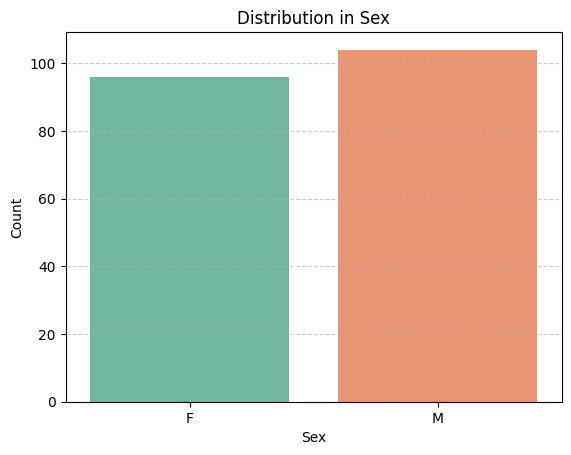

In [14]:
print("Column: 'Sex'")
print(df['Sex'].value_counts())
print(f"Number of unique classes in 'Sex': {df['Sex'].nunique()}")

# Plot
sns.countplot(x='Sex', data=df, palette='Set2')
plt.title('Distribution in Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Checking Distribution for Categorical Label : Blood Pressure

Column: 'BP'
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
Number of unique classes in 'BP': 3


C:\Users\SAAD KHAN\AppData\Local\Temp\ipykernel_4848\2948710817.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BP', data=df, palette='Set2')


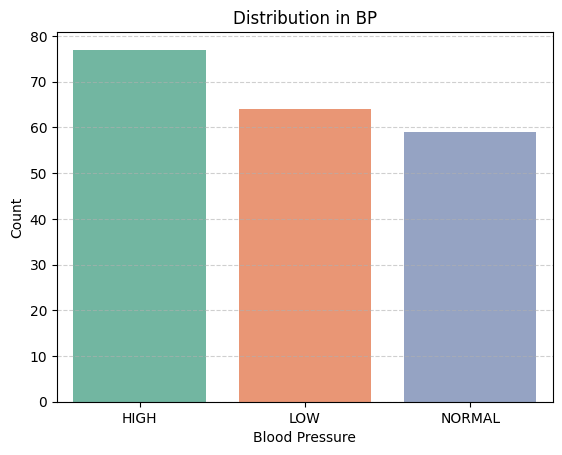

In [15]:
print("Column: 'BP'")
print(df['BP'].value_counts())
print(f"Number of unique classes in 'BP': {df['BP'].nunique()}")

# Plot
sns.countplot(x='BP', data=df, palette='Set2')
plt.title('Distribution in BP')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Checking distribution for Categorical Label : Cholestrol

Column: 'Cholesterol'
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64
Number of unique classes in 'Cholesterol': 2


C:\Users\SAAD KHAN\AppData\Local\Temp\ipykernel_4848\1280258182.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cholesterol', data=df, palette='Set2')


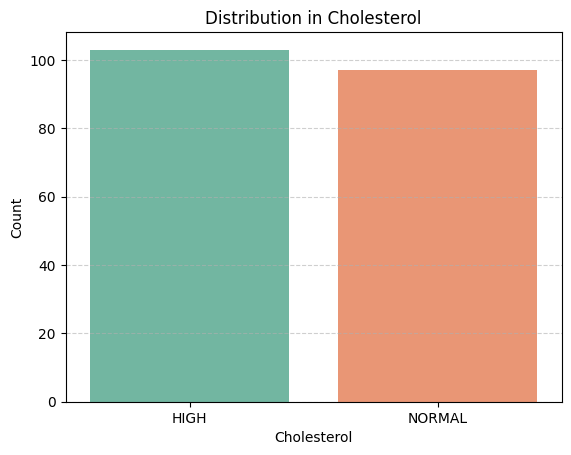

In [16]:
print("Column: 'Cholesterol'")
print(df['Cholesterol'].value_counts())
print(f"Number of unique classes in 'Cholesterol': {df['Cholesterol'].nunique()}")

# Plot
sns.countplot(x='Cholesterol', data=df, palette='Set2')
plt.title('Distribution in Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Checking Distribution for Categorical Label : Drug

Column: 'Drug' (Target)
Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64
Number of unique classes in 'Drug': 5


C:\Users\SAAD KHAN\AppData\Local\Temp\ipykernel_4848\2408213865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug', data=df, palette='Set2')


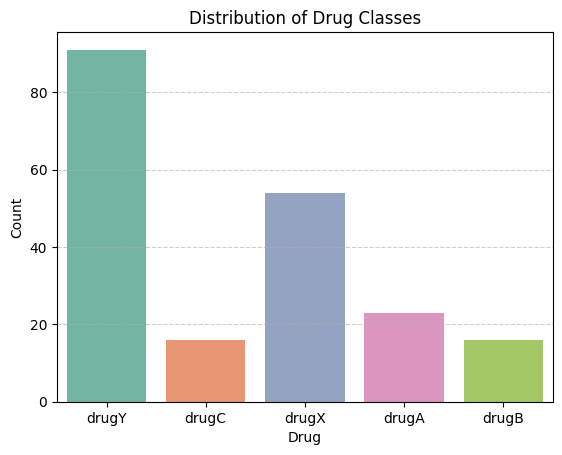

In [17]:
print("Column: 'Drug' (Target)")
print(df['Drug'].value_counts())
print(f"Number of unique classes in 'Drug': {df['Drug'].nunique()}")

# Plot
sns.countplot(x='Drug', data=df, palette='Set2')
plt.title('Distribution of Drug Classes')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


#### 1.3.2 Feature Analysis

Descriptive statistics for numerical columns 

In [19]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Checking Distribution : Plotting Histogram for Age 

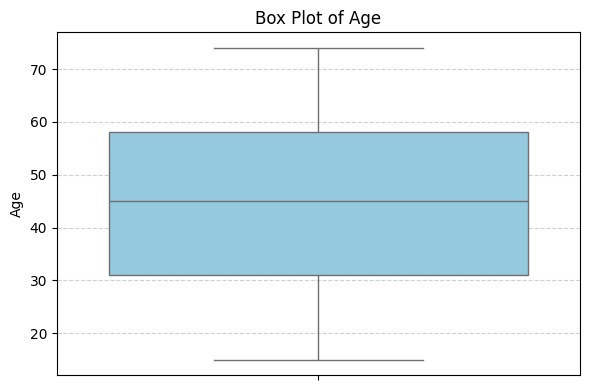

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Age', data=df, color='skyblue')
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Happy to see no outliers. 

Checking Distribution : Plotting Histogram for Na to K ratio

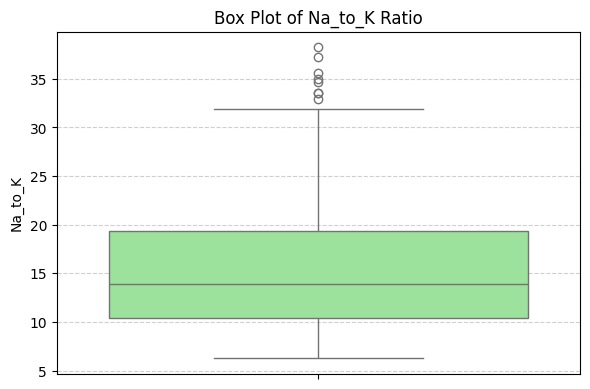

In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Na_to_K', data=df, color='lightgreen')
plt.title('Box Plot of Na_to_K Ratio')
plt.ylabel('Na_to_K')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [23]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Na_to_K'].quantile(0.25)
Q3 = df['Na_to_K'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Na_to_K'] < lower_bound) | (df['Na_to_K'] > upper_bound)]

# Display count and the actual outlier rows
print(f"Number of outliers in 'Na_to_K': {outliers.shape[0]}")
print("\nOutlier rows:")
print(outliers)


Number of outliers in 'Na_to_K': 8

Outlier rows:
     Age Sex    BP Cholesterol  Na_to_K   Drug
24    33   F   LOW        HIGH   33.486  drugY
96    58   F   LOW        HIGH   38.247  drugY
98    20   M  HIGH      NORMAL   35.639  drugY
128   47   M   LOW      NORMAL   33.542  drugY
131   52   M   LOW      NORMAL   32.922  drugY
184   18   F  HIGH        HIGH   37.188  drugY
188   65   M  HIGH      NORMAL   34.997  drugY
194   46   F  HIGH        HIGH   34.686  drugY


In [24]:
# Create a flag column to indicate outliers
df['Na_to_K_outlier'] = ((df['Na_to_K'] < lower_bound) | (df['Na_to_K'] > upper_bound)).astype(int)

# Then explore if outliers are skewed toward any Drug class
print(df.groupby('Drug')['Na_to_K_outlier'].sum())


Drug
drugA    0
drugB    0
drugC    0
drugX    0
drugY    8
Name: Na_to_K_outlier, dtype: int64


Reason : Why I am keeping those outliers 

* All 8 outliers are associated with a single class: drugY.This suggests they carry critical class-specific information.

* Removing them would make it harder for your model to learn patterns that distinguish drugY from other drug types.

In future I plan to implement Multiple Classification Models: 

* Logistic Regression

* k-NN

* Support Vector Machine

* Random Forest

* XGBoost


Out of which distance-based models (Logistic Regression, k-NN, SVM) is sensitive to outliers, but this can be handled by scaling the data (e.g., RobustScaler).

Whereas, Random Forest and XGBoost are robust to outliers.

Mathematically its 8 out of 200 rows (i.e., 4%) are outliers.

Anyway I will be comparing models with 5 different ML Algorithm 

Removing them would reduce classifier's ability to detect high Na_to_K scenarios linked with drugY.Which I don't want Hence there are more pros then cons I see in it moving ahead by keeping the outliers. 

#### 1.3.3 Exploring Relationship